In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

from wordcloud import WordCloud


# Let's read the data and choose the columns to use

In [2]:
listings = pd.read_csv('listings.csv')

In [3]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [4]:
listings = listings[['neighbourhood', 'property_type', 'room_type', 'accommodates', 'bathrooms','bedrooms','beds','bed_type', 'amenities', 'price', 'guests_included', 'review_scores_rating','availability_30', 'availability_60', 'availability_90',
       'availability_365']]

# imputing missing values

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   neighbourhood         3402 non-null   object 
 1   property_type         3817 non-null   object 
 2   room_type             3818 non-null   object 
 3   accommodates          3818 non-null   int64  
 4   bathrooms             3802 non-null   float64
 5   bedrooms              3812 non-null   float64
 6   beds                  3817 non-null   float64
 7   bed_type              3818 non-null   object 
 8   amenities             3818 non-null   object 
 9   price                 3818 non-null   object 
 10  guests_included       3818 non-null   int64  
 11  review_scores_rating  3171 non-null   float64
 12  availability_30       3818 non-null   int64  
 13  availability_60       3818 non-null   int64  
 14  availability_90       3818 non-null   int64  
 15  availability_365     

In [6]:
# drop neighbourhood with null values

listings.dropna(subset = ['neighbourhood'], inplace = True)

In [7]:
# fill property_type, bathrooms, bedrooms, beds with most frequent value and fill review_scores_rating with mean

listings['review_scores_rating'].fillna(listings['review_scores_rating'].mean(), inplace = True)
listings['property_type'].fillna(listings['property_type'].mode()[0], inplace = True)
listings['bathrooms'].fillna(listings['bathrooms'].mode()[0], inplace = True)
listings['bedrooms'].fillna(listings['bedrooms'].mode()[0], inplace = True)
listings['beds'].fillna(listings['beds'].mode()[0], inplace = True)

In [8]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3402 entries, 0 to 3817
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   neighbourhood         3402 non-null   object 
 1   property_type         3402 non-null   object 
 2   room_type             3402 non-null   object 
 3   accommodates          3402 non-null   int64  
 4   bathrooms             3402 non-null   float64
 5   bedrooms              3402 non-null   float64
 6   beds                  3402 non-null   float64
 7   bed_type              3402 non-null   object 
 8   amenities             3402 non-null   object 
 9   price                 3402 non-null   object 
 10  guests_included       3402 non-null   int64  
 11  review_scores_rating  3402 non-null   float64
 12  availability_30       3402 non-null   int64  
 13  availability_60       3402 non-null   int64  
 14  availability_90       3402 non-null   int64  
 15  availability_365      3402

# First Question: Which amenities are most common. list first three ?

## Working on amenities column

In [9]:
listings['amenities'].value_counts()

# there are so many amenities

amenities
{}                                                                                                                                                                                                                                                                                                                                                                        19
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                                                                    11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"24-Hour Chec

In [10]:
# lets separate the amenities

amenities = listings['amenities'].str.replace('}', '').str.replace('{', '').str.replace('(s)', '').str.replace('"', '').str.replace('/', ',').str.replace(' ', '_')

In [11]:
# lets check out unique values of amenities seperated by comma and append them to a list

amenities_list = []

for i in amenities:
    amenities_list.append(i.split(','))
    
amenities_list = [item for sublist in amenities_list for item in sublist]

In [12]:
# removing the duplicate values from the list

unique_list = list(set(amenities_list))

In [13]:
# i create a unique list to see if there is a problem with values or not

unique_list

['Elevator_in_Building',
 'Fire_Extinguisher',
 '',
 'Essentials',
 'Kitchen',
 'Cat',
 'Hot_Tub',
 'Internet',
 'Hangers',
 'Carbon_Monoxide_Detector',
 'Doorman',
 'Free_Parking_on_Premises',
 'Other_pet',
 'Wireless_Intercom',
 'Laptop_Friendly_Workspace',
 'Suitable_for_Events',
 'Cable_TV',
 'Iron',
 'Pool',
 'Pets_Allowed',
 'Heating',
 'Wireless_Internet',
 'Safety_Card',
 'Gym',
 'Shampoo',
 '_Dryer',
 'Washer',
 'Washer_',
 'Smoke_Detector',
 'First_Aid_Kit',
 'Dryer',
 'Family',
 'Wheelchair_Accessible',
 'Buzzer',
 'Indoor_Fireplace',
 'Lock_on_Bedroom_Door',
 'Dog',
 'Kid_Friendly',
 'Breakfast',
 'Hair_Dryer',
 'TV',
 'Smoking_Allowed',
 'Pets_live_on_this_property',
 'Air_Conditioning',
 '24-Hour_Check-in']

In [14]:
# there is empty value in the list, lets remove it

amenities_list.remove('')

# and there are two strings (Washer_, _Dryer) with underscore, i think its Washer_Dryer, lets replace them

amenities_list = [i.replace('Washer_', 'Washer_Dryer') for i in amenities_list]
amenities_list = [i.replace('_Dryer', 'Washer_Dryer') for i in amenities_list]

In [15]:
# i want to one string with all the amenities, lets join them

text = ','.join(amenities_list)

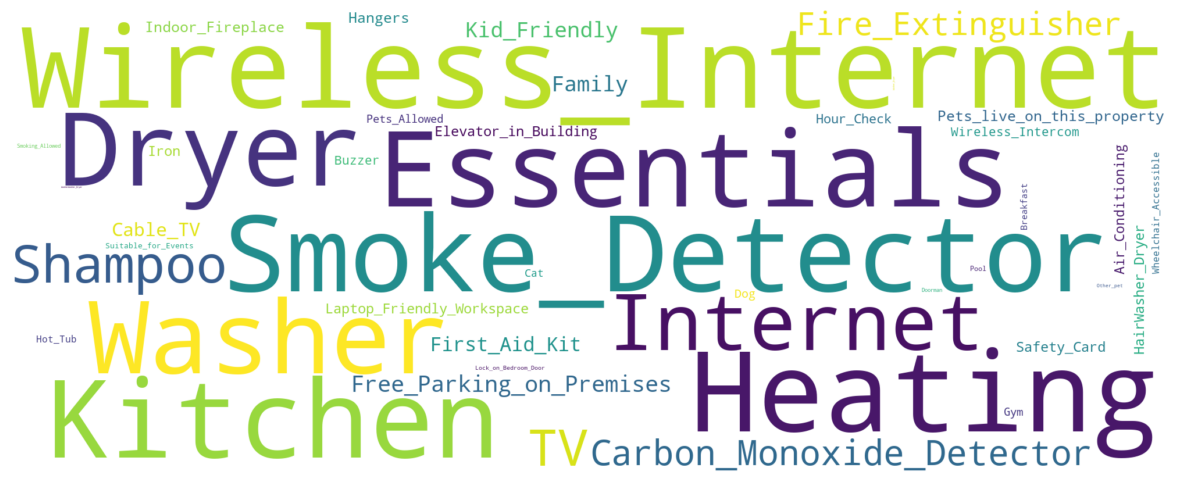

In [16]:
# lets create a wordcloud

wordcloud = WordCloud(width = 2000, height = 800, background_color = 'white', max_words =50, contour_width = 3, contour_color = 'steelblue', collocations=False)
wordcloud.generate(text)

plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# First Answer: wireless internet is the most common amenity, followed by heating, kitchen

# Second Question: What is the relationship between numeric columns, especially price ?

In [17]:
# first lets convert the price column to float

listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

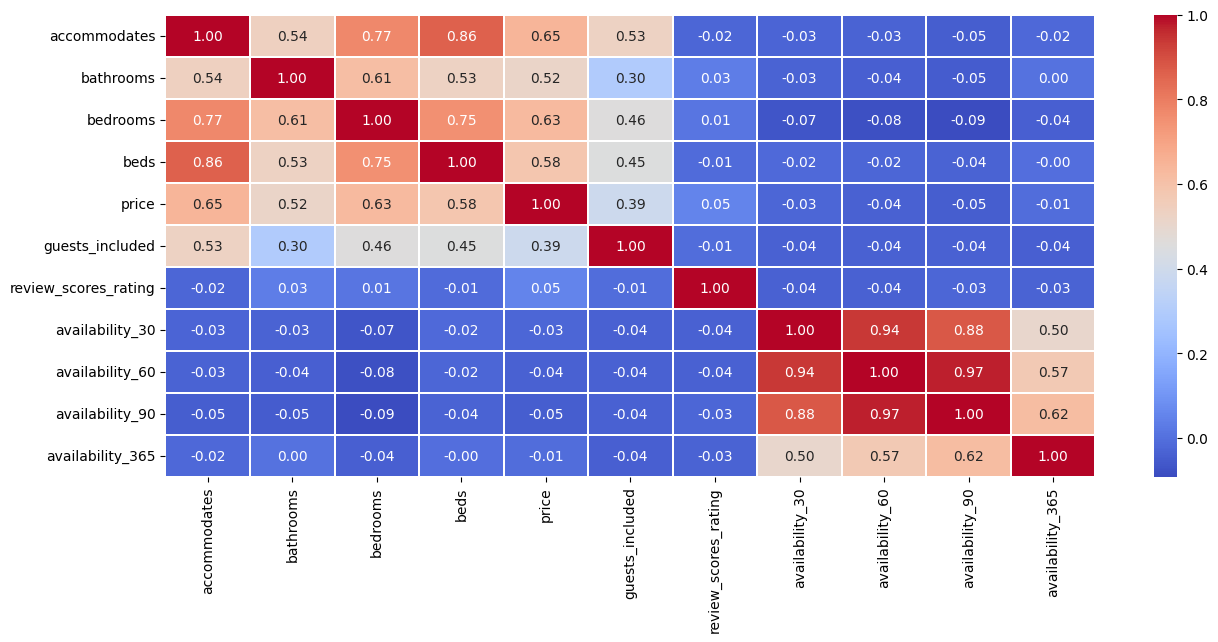

In [18]:
# create a new dataframe to see relationship between numeric values each other

listings_num = listings.select_dtypes(include = ['float64', 'int64'])
plt.figure(figsize = (15, 6))
sns.heatmap(listings_num.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm', linewidths = 0.1, linecolor = 'white')
plt.show()

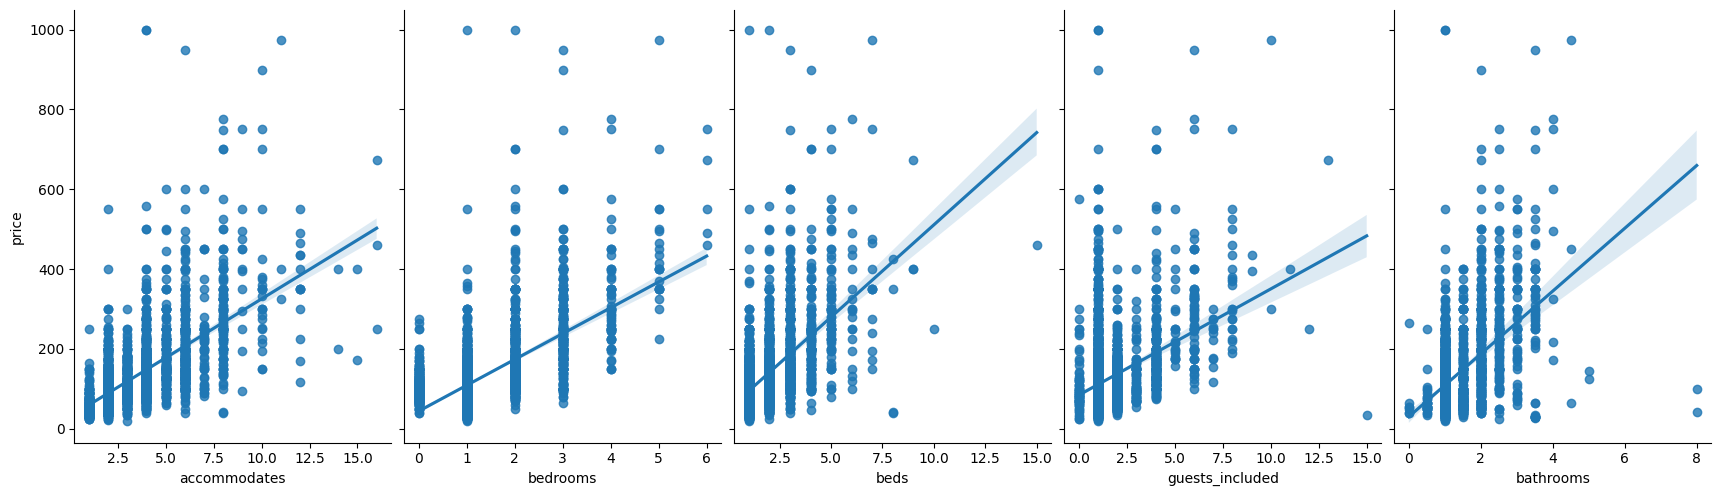

In [19]:
# we can see this relationship using pairplot as well

sns.pairplot(listings_num, x_vars = ['accommodates', 'bedrooms', 'beds', 'guests_included', 'bathrooms'], y_vars = ['price'], height = 5, aspect = 0.7, kind = 'reg')
plt.show()

# Second Answer: We can see that there is a strong correlation between price and accommodates, bedrooms, beds, guests_included, bathrooms

# Third Question: What is the relationship between price, price range and other categorical columns?

# Third Answers are below

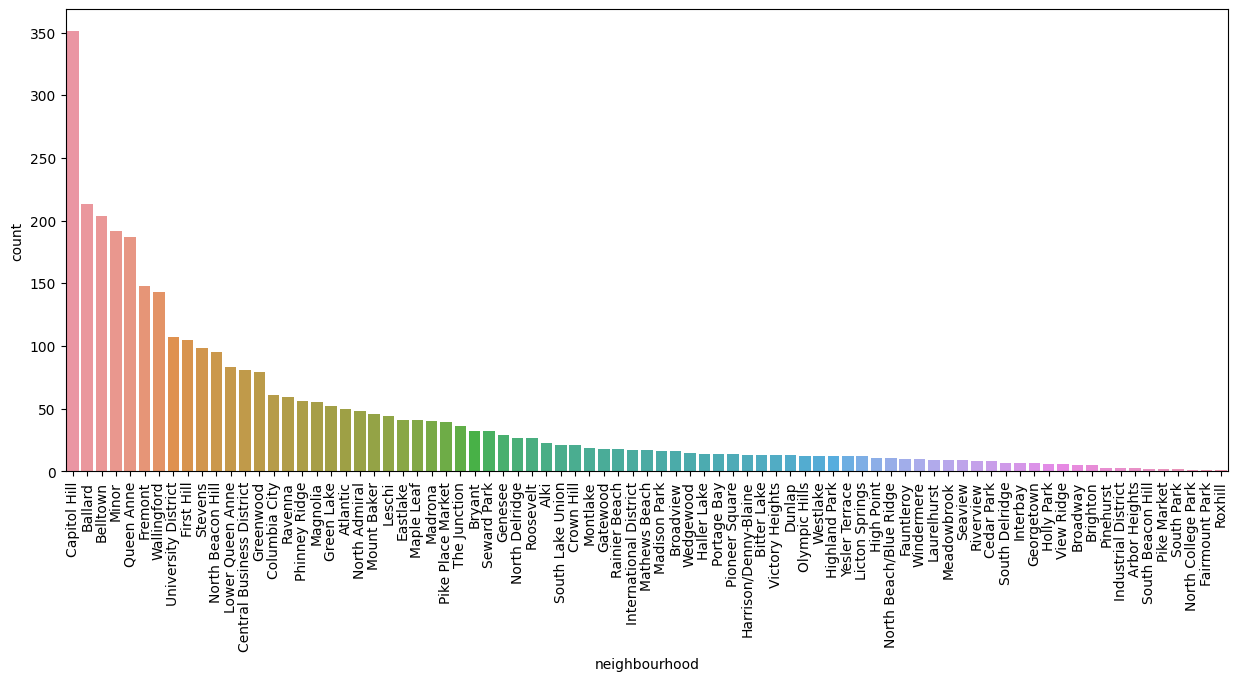

In [20]:
# now lets see the relationship between neighbourhood and price
# first lets see the neighbourhood distribution

plt.figure(figsize = (15, 6))
sns.countplot(x = 'neighbourhood', data = listings, order = listings['neighbourhood'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [21]:
# now i will create a price range column to see the relationship between neighbourhood and price. lets see price mean, median and max to decide the price range

In [22]:
# what is the mean, median and max values of price

print('mean:',listings['price'].mean())
print('median:',listings['price'].median())
print('max:',listings['price'].max())

mean: 129.28336272780717
median: 100.0
max: 1000.0


In [23]:
# we can see that the mean is 127, median is 100 and max is 1000. i will create 3 levels: low, medium, high. low will be 0-100, medium will be 100-200, high will be 200-1000

listings['price_level'] = pd.cut(listings['price'], bins = [0, 100, 200, 1000], labels = ['low', 'medium', 'high'])

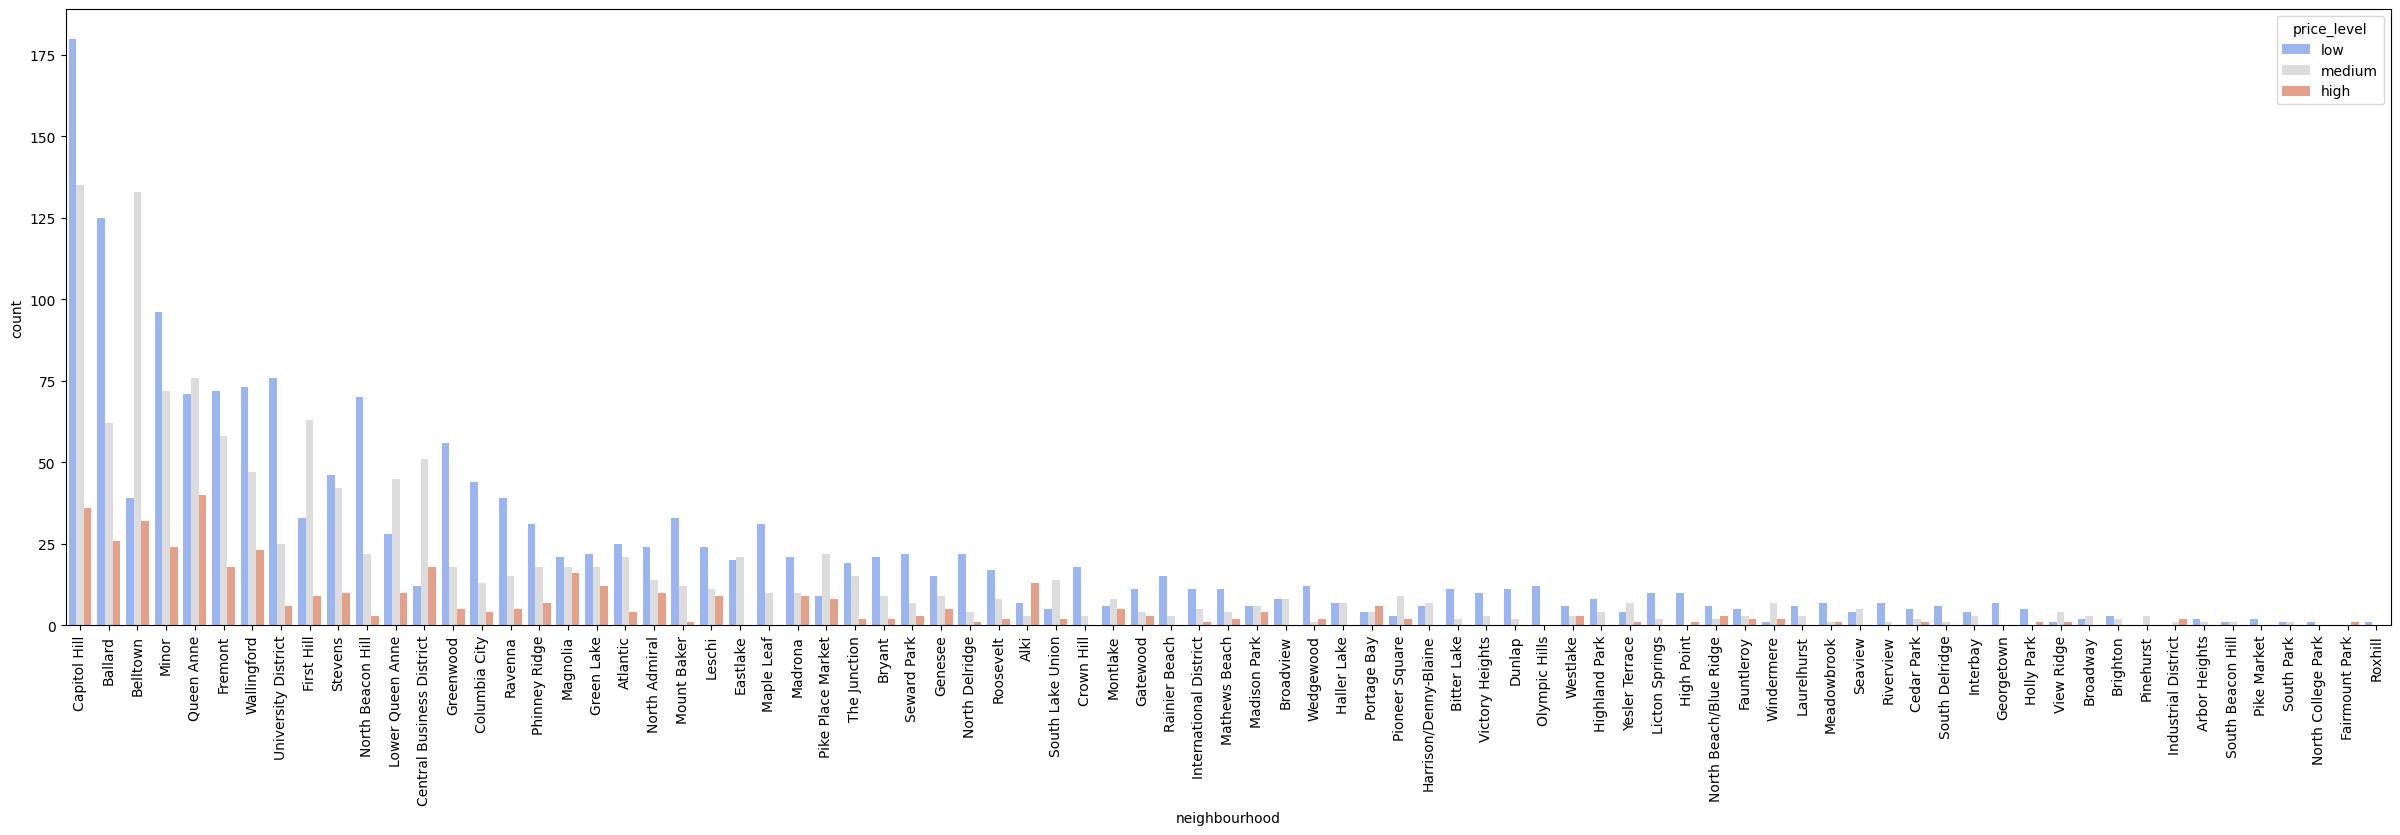

In [24]:
# count the number of listings in each neighbourhood

plt.figure(figsize = (30, 8))
sns.countplot(x = 'neighbourhood', data = listings, palette = 'coolwarm', hue = 'price_level', order = listings['neighbourhood'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

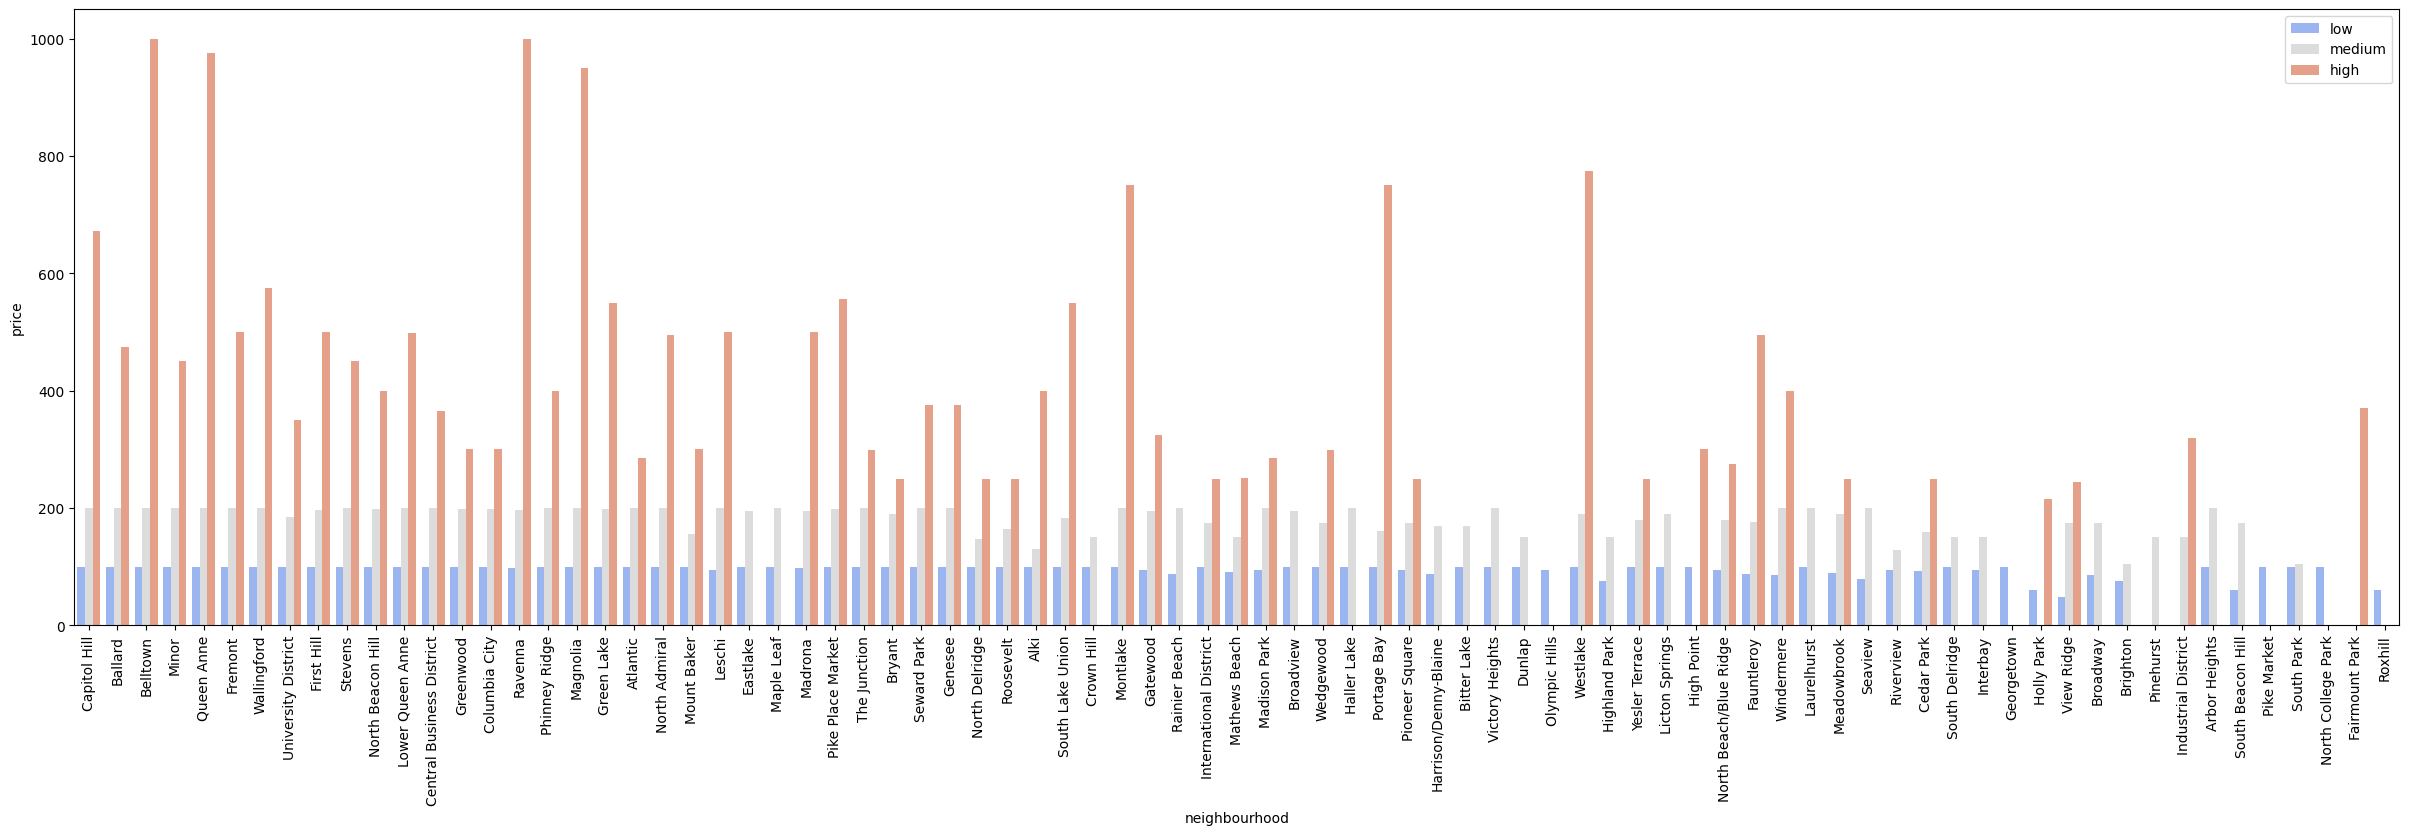

In [25]:
# lets find where is the most expensive neighbourhood with plot the bar chart
plt.figure(figsize = (30, 8))
sns.barplot(x = 'neighbourhood', y = 'price', data = listings, palette = 'coolwarm',estimator=np.max, hue = 'price_level', order = listings['neighbourhood'].value_counts().index, errorbar=None)
plt.legend(loc = 'upper right')
plt.xticks(rotation = 90)
plt.show()

In [26]:
# most expensive neighbourhood and where is the cheapest neighbourhood 

listings.groupby('neighbourhood')['price'].max().sort_values(ascending = False)


neighbourhood
Ravenna               1000.0
Belltown               999.0
Queen Anne             975.0
Magnolia               950.0
Westlake               775.0
                       ...  
Pike Market             99.0
Georgetown              99.0
North College Park      99.0
Olympic Hills           95.0
Roxhill                 60.0
Name: price, Length: 81, dtype: float64

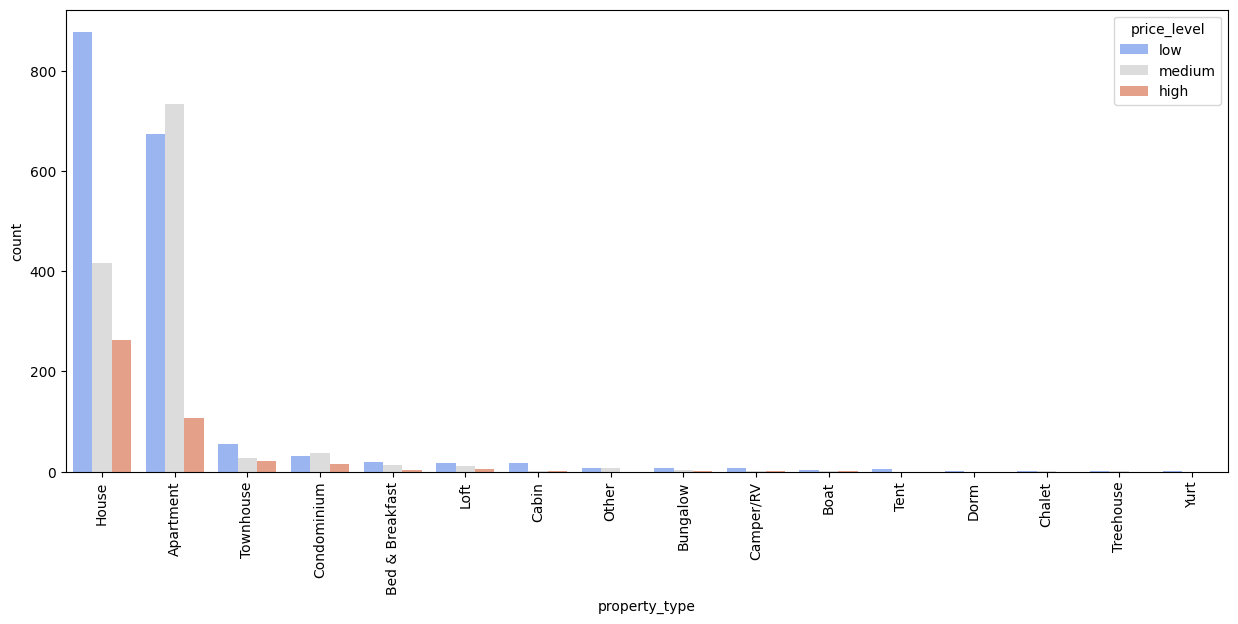

In [27]:
# maybe we can see the relationship between other categorical variables and price_level

# lets see the relationship between property_type and price_level

plt.figure(figsize = (15, 6))

sns.countplot(x = 'property_type', data = listings, palette = 'coolwarm', hue = 'price_level', order = listings['property_type'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()



In [28]:
# we can see that the most common property type is apartment, followed by house. there are so many price levels in apartment and house.especially in apartment, there are so many low price level.

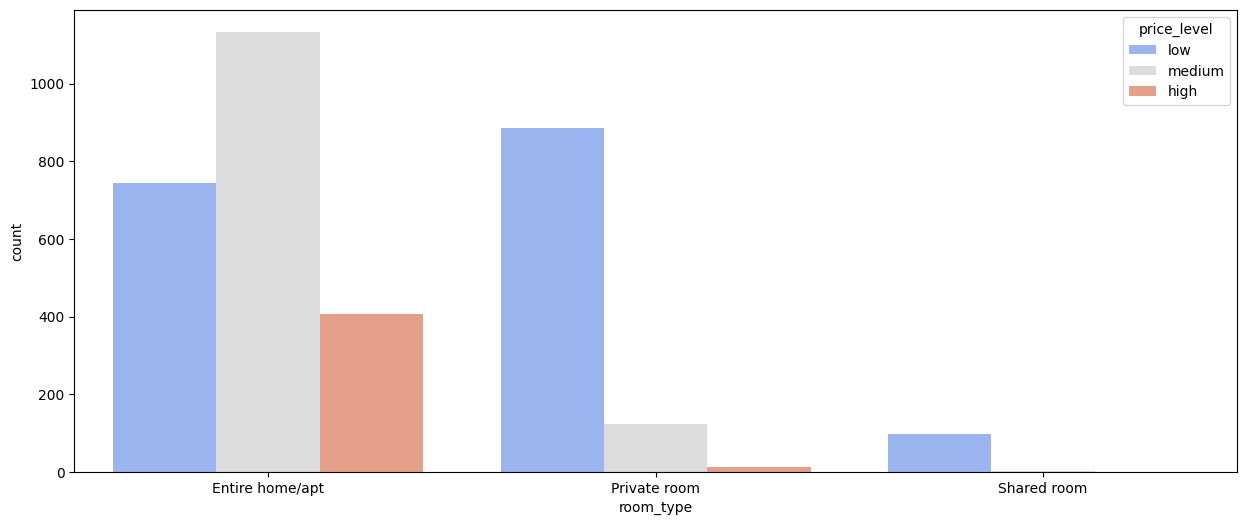

In [29]:
# lets see the relationship between room_type and price_level

plt.figure(figsize = (15, 6))

sns.countplot(x = 'room_type', data = listings, palette = 'coolwarm', hue = 'price_level', order = listings['room_type'].value_counts().index)

plt.show()

In [30]:
# as we can see, there is no shared room in high price level. and there are so many low price level in private room.

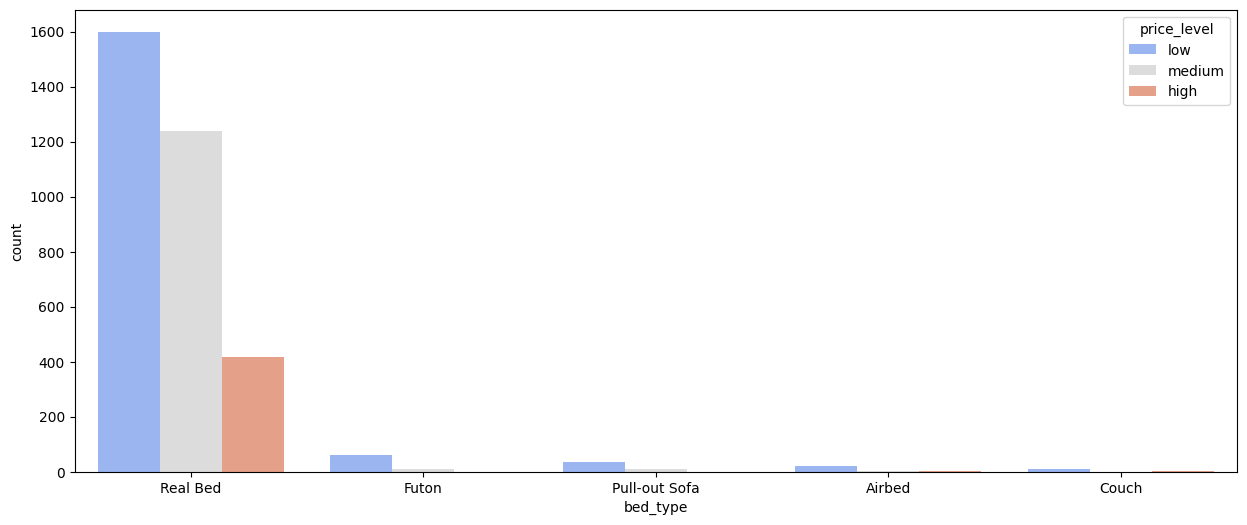

In [31]:
# lets see the relationship between bed_type and price_level

plt.figure(figsize = (15, 6))

sns.countplot(x = 'bed_type', data = listings, palette = 'coolwarm', hue = 'price_level', order = listings['bed_type'].value_counts().index)

plt.show()